In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv(r'C:\Users\yazan\Documents\pyprojects\test2\train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [9]:
df.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [10]:
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp',]
print(df['Embarked'].unique(),df['Parch'].unique(),df['Sex'].unique(),df['SibSp'].unique(),df['Pclass'].unique())


['S' 'C' 'Q' nan] [0 1 2 5 3 4 6] ['male' 'female'] [1 0 3 4 2 5 8] [3 1 2]


In [11]:
df['Embarked'] = df['Embarked'].fillna('S')

<AxesSubplot:>

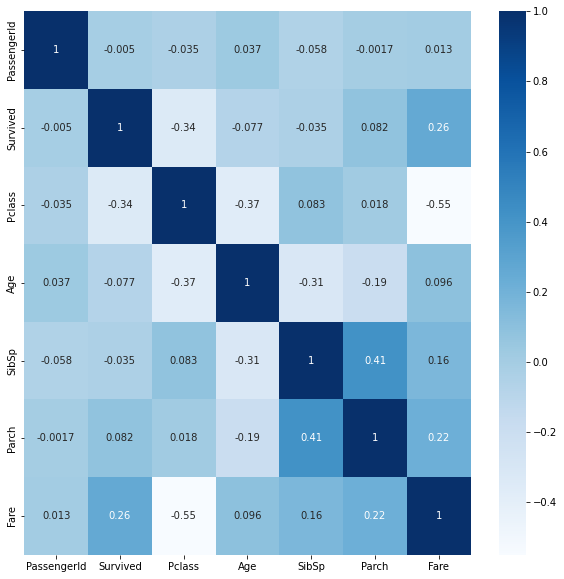

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [13]:
#fare depends on class and parch and sibsp
people_num_class = df.groupby(['Pclass', 'Parch', 'SibSp']).count()
people_num_class

PassengerId  Survived  Name  Sex  Age  Ticket  Fare  \
Pclass Parch SibSp                                                        
1      0     0              109       109   109  109   86     109   109   
             1               51        51    51   51   45      51    51   
             2                3         3     3    3    3       3     3   
       1     0               19        19    19   19   18      19    19   
             1               12        12    12   12   12      12    12   
       2     0                9         9     9    9    9       9     9   
             1                7         7     7    7    7       7     7   
             2                2         2     2    2    2       2     2   
             3                3         3     3    3    3       3     3   
       4     1                1         1     1    1    1       1     1   
2      0     0              104       104   104  104   93     104   104   
             1               26        26    26   26   26      26    26   
             2                3         3     3    3    3       3     3   
             3                1         1     1    1    1       1     1   
       1     0                8         8     8    8    8       8     8   
             1               20        20    20   20   20      20    20   
             2                4         4     4    4    4       4     4   
       2     0                8         8     8    8    8       8     8   
             1                8         8     8    8    8       8     8   
       3     1                1         1     1    1    1       1     1   
             2                1         1     1    1    1       1     1   
3      0     0              324       324   324  324  225     324   324   
             1               46        46    46   46   31      46    46   
             2               10        10    10   10    7      10    10   
             3                1         1     1    1    1       1     1   
       1     0               11        11    11   11   11      11    11   
             1               25        25    25   25   22      25    25   
             2                3         3     3    3    3       3     3   
             3                7         7     7    7    3       7     7   
             4                9         9     9    9    9       9     9   
       2     0               12        12    12   12    9      12    12   
             1                4         4     4    4    2       4     4   
             2                2         2     2    2    2       2     2   
             3                4         4     4    4    4       4     4   
             4                9         9     9    9    9       9     9   
             5                5         5     5    5    5       5     5   
             8                7         7     7    7    0       7     7   
       3     0                1         1     1    1    1       1     1   
             1                2         2     2    2    2       2     2   
       4     0                1         1     1    1    1       1     1   
             1                2         2     2    2    2       2     2   
       5     0                2         2     2    2    2       2     2   
             1                3         3     3    3    3       3     3   
       6     1                1         1     1    1    1       1     1   

                    Cabin  Embarked  
Pclass Parch SibSp                   
1      0     0         78       109  
             1         45        51  
             2          2         3  
       1     0         18        19  
             1         11        12  
       2     0          9         9  
             1          7         7  
             2          2         2  
             3          3         3  
       4     1          1         1  
2      0     0         11       104  
             1          0        26  
             2          0         3  

In [14]:
#most people are 3d class alone passenger
med_fare = df.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
df['Fare'] = df['Fare'].fillna(med_fare)

In [15]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [16]:
# out of 891 687 is missing so we will drop the feature
del df['Cabin']
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


<AxesSubplot:xlabel='Age', ylabel='Density'>

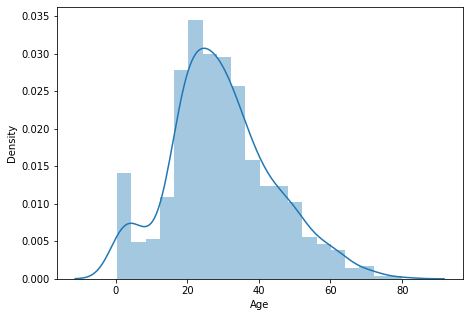

In [17]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Age'])

In [18]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [19]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:

up_lim = df['Age'].mean() + 3*df['Age'].std()
lw_lim = df['Age'].mean() - 3*df['Age'].std()
print(up_lim,lw_lim)

68.70516332506747 -9.306928030949827


In [21]:
bd =df
bd['Age'] = np.where(bd['Age'] > up_lim , up_lim , bd['Age'])
bd['Age'] = np.where(bd['Age'] < lw_lim , lw_lim , bd['Age'])
print(df['Age'].max(),df['Age'].min())

68.70516332506747 0.42


<AxesSubplot:xlabel='Age', ylabel='Density'>

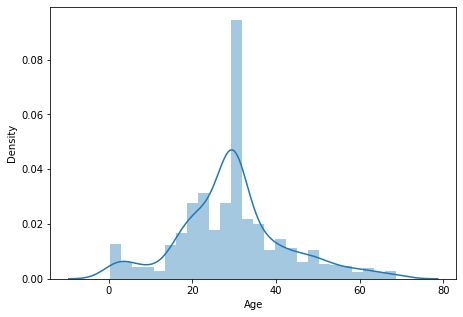

In [22]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Age'])

In [23]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                               

<AxesSubplot:xlabel='Fare', ylabel='Density'>

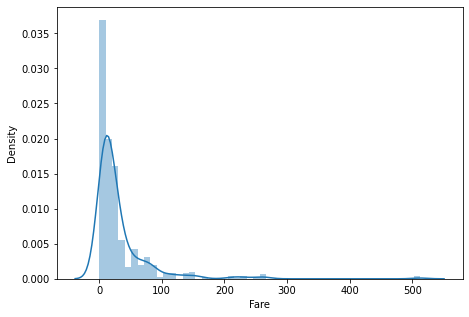

In [24]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Fare'])

In [25]:
perct_25 = df['Fare'].quantile(0.25)
perct_75 = df['Fare'].quantile(0.75)
iqr = 1.5*(perct_75-perct_25)
upper_lim = perct_75+iqr
lower_lim = perct_25-iqr
print(upper_lim,lower_lim)

65.6344 -26.724


In [26]:
bd =df
bd['Fare'] = np.where(bd['Fare'] > upper_lim ,  bd['Fare'].median() , bd['Fare'])
bd['Fare'] = np.where(bd['Fare'] < lower_lim , bd['Fare'].median() , bd['Fare'])
print(df['Fare'].max(),df['Fare'].min())

65.0 0.0


<AxesSubplot:xlabel='Fare', ylabel='Density'>

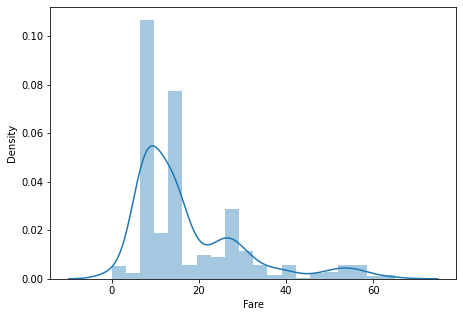

In [27]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Fare'])

In [28]:
# ticket feature hold no meaning it is like an id 
del df['Ticket']
del df['PassengerId']

In [29]:
#we dont nead name feature
del df['Name']

In [30]:
# will give numeric values for sex feature male:0 female:1
df['Sex'] = np.where(df['Sex'] =="male" ,  0 , df['Sex'])
df['Sex'] = np.where(df['Sex'] =="female" ,  1 , df['Sex'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,S
1,1,1,1,38.000000,1,0,14.4542,C
2,1,3,1,26.000000,0,0,7.9250,S
3,1,1,1,35.000000,1,0,53.1000,S
4,0,3,0,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,S
887,1,1,1,19.000000,0,0,30.0000,S
888,0,3,1,29.699118,1,2,23.4500,S
889,1,1,0,26.000000,0,0,30.0000,C


In [31]:
#will give numeric values to embarked  s=0 c=1 q=2
df['Embarked'] = np.where(df['Embarked'] =="S" ,  0 , df['Embarked'])
df['Embarked'] = np.where(df['Embarked'] =="C" ,  1 , df['Embarked'])
df['Embarked'] = np.where(df['Embarked'] =="Q" ,  2 , df['Embarked'])
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,14.4542,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


In [32]:
print(df['Parch'].max(),df['Parch'].min())
print(df['SibSp'].max(),df['SibSp'].min())

6 0
8 0


<AxesSubplot:xlabel='Parch', ylabel='Density'>

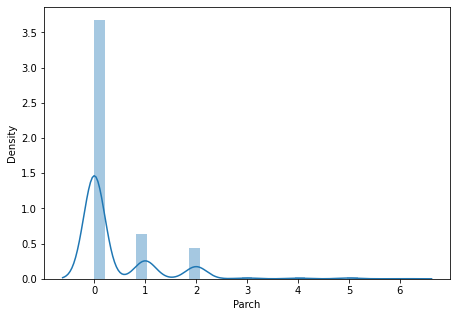

In [33]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Parch'])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

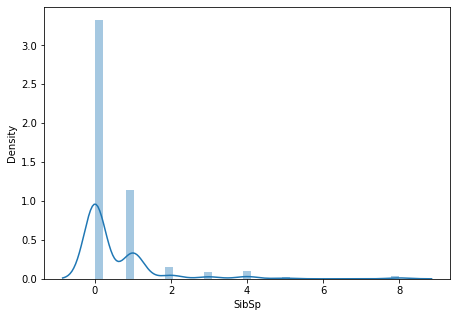

In [34]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['SibSp'])

In [35]:
up_lim = df['Parch'].quantile(0.99)
lw_lim = df['Parch'].quantile(0.01)
print(up_lim,lw_lim)

4.0 0.0


In [36]:
df['Parch'] = np.where(df['Parch'] > up_lim ,  df['Parch'].median() , df['Parch'])
df['Parch'] = np.where(df['Parch'] < lower_lim , df['Parch'].median() , df['Parch'])

<AxesSubplot:xlabel='Parch', ylabel='Density'>

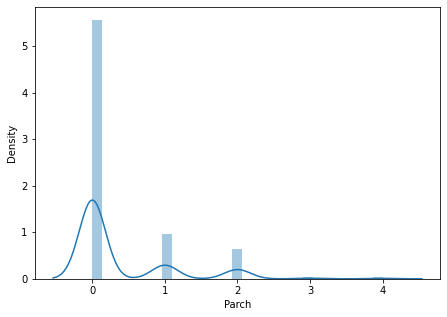

In [37]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Parch'])

In [38]:
up_lim = df['SibSp'].quantile(0.99)
lw_lim = df['SibSp'].quantile(0.01)
print(up_lim,lw_lim)

5.0 0.0


In [39]:
df['SibSp'] = np.where(df['SibSp'] > up_lim ,  df['SibSp'].median() , df['SibSp'])
df['SibSp'] = np.where(df['SibSp'] < lower_lim , df['SibSp'].median() , df['SibSp'])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

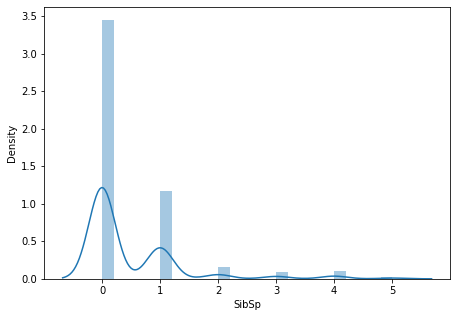

In [40]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['SibSp'])

In [41]:
# sex , and embarked are nominal so they can't be normalized
# parch , sibsp , fare and age are numeric so they will be normalized using z-score
# pclass is ordinal so it will be normalized using z
df['Pclass'] = np.where(df['Pclass'] == 1 ,  1 , df['Pclass'])
df['Pclass'] = np.where(df['Pclass'] == 2 ,  0.5 , df['Pclass'])
df['Pclass'] = np.where(df['Pclass'] == 3 ,  0 , df['Pclass'])
df['Pclass']

0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
886    0.5
887    1.0
888    0.0
889    1.0
890    0.0
Name: Pclass, Length: 891, dtype: float64

In [42]:
df['Age']=stats.zscore(df['Age'])
df['Parch']=stats.zscore(df['Parch'])
df['SibSp']=stats.zscore(df['SibSp'])
df['Fare']=stats.zscore(df['Fare'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0.0,0,-0.594571,0.613749,-0.493598,-0.797554,0
1,1,1.0,1,0.645665,0.613749,-0.493598,-0.230556,1
2,1,0.0,1,-0.284512,-0.523154,-0.493598,-0.744429,0
3,1,1.0,1,0.413121,0.613749,-0.493598,2.811012,0
4,0,0.0,0,0.413121,-0.523154,-0.493598,-0.734591,0
...,...,...,...,...,...,...,...,...
886,0,0.5,0,-0.206998,-0.523154,-0.493598,-0.345007,0
887,1,1.0,1,-0.827116,-0.523154,-0.493598,0.992956,0
888,0,0.0,1,0.002224,0.613749,2.352975,0.477446,0
889,1,1.0,0,-0.284512,-0.523154,-0.493598,0.992956,1


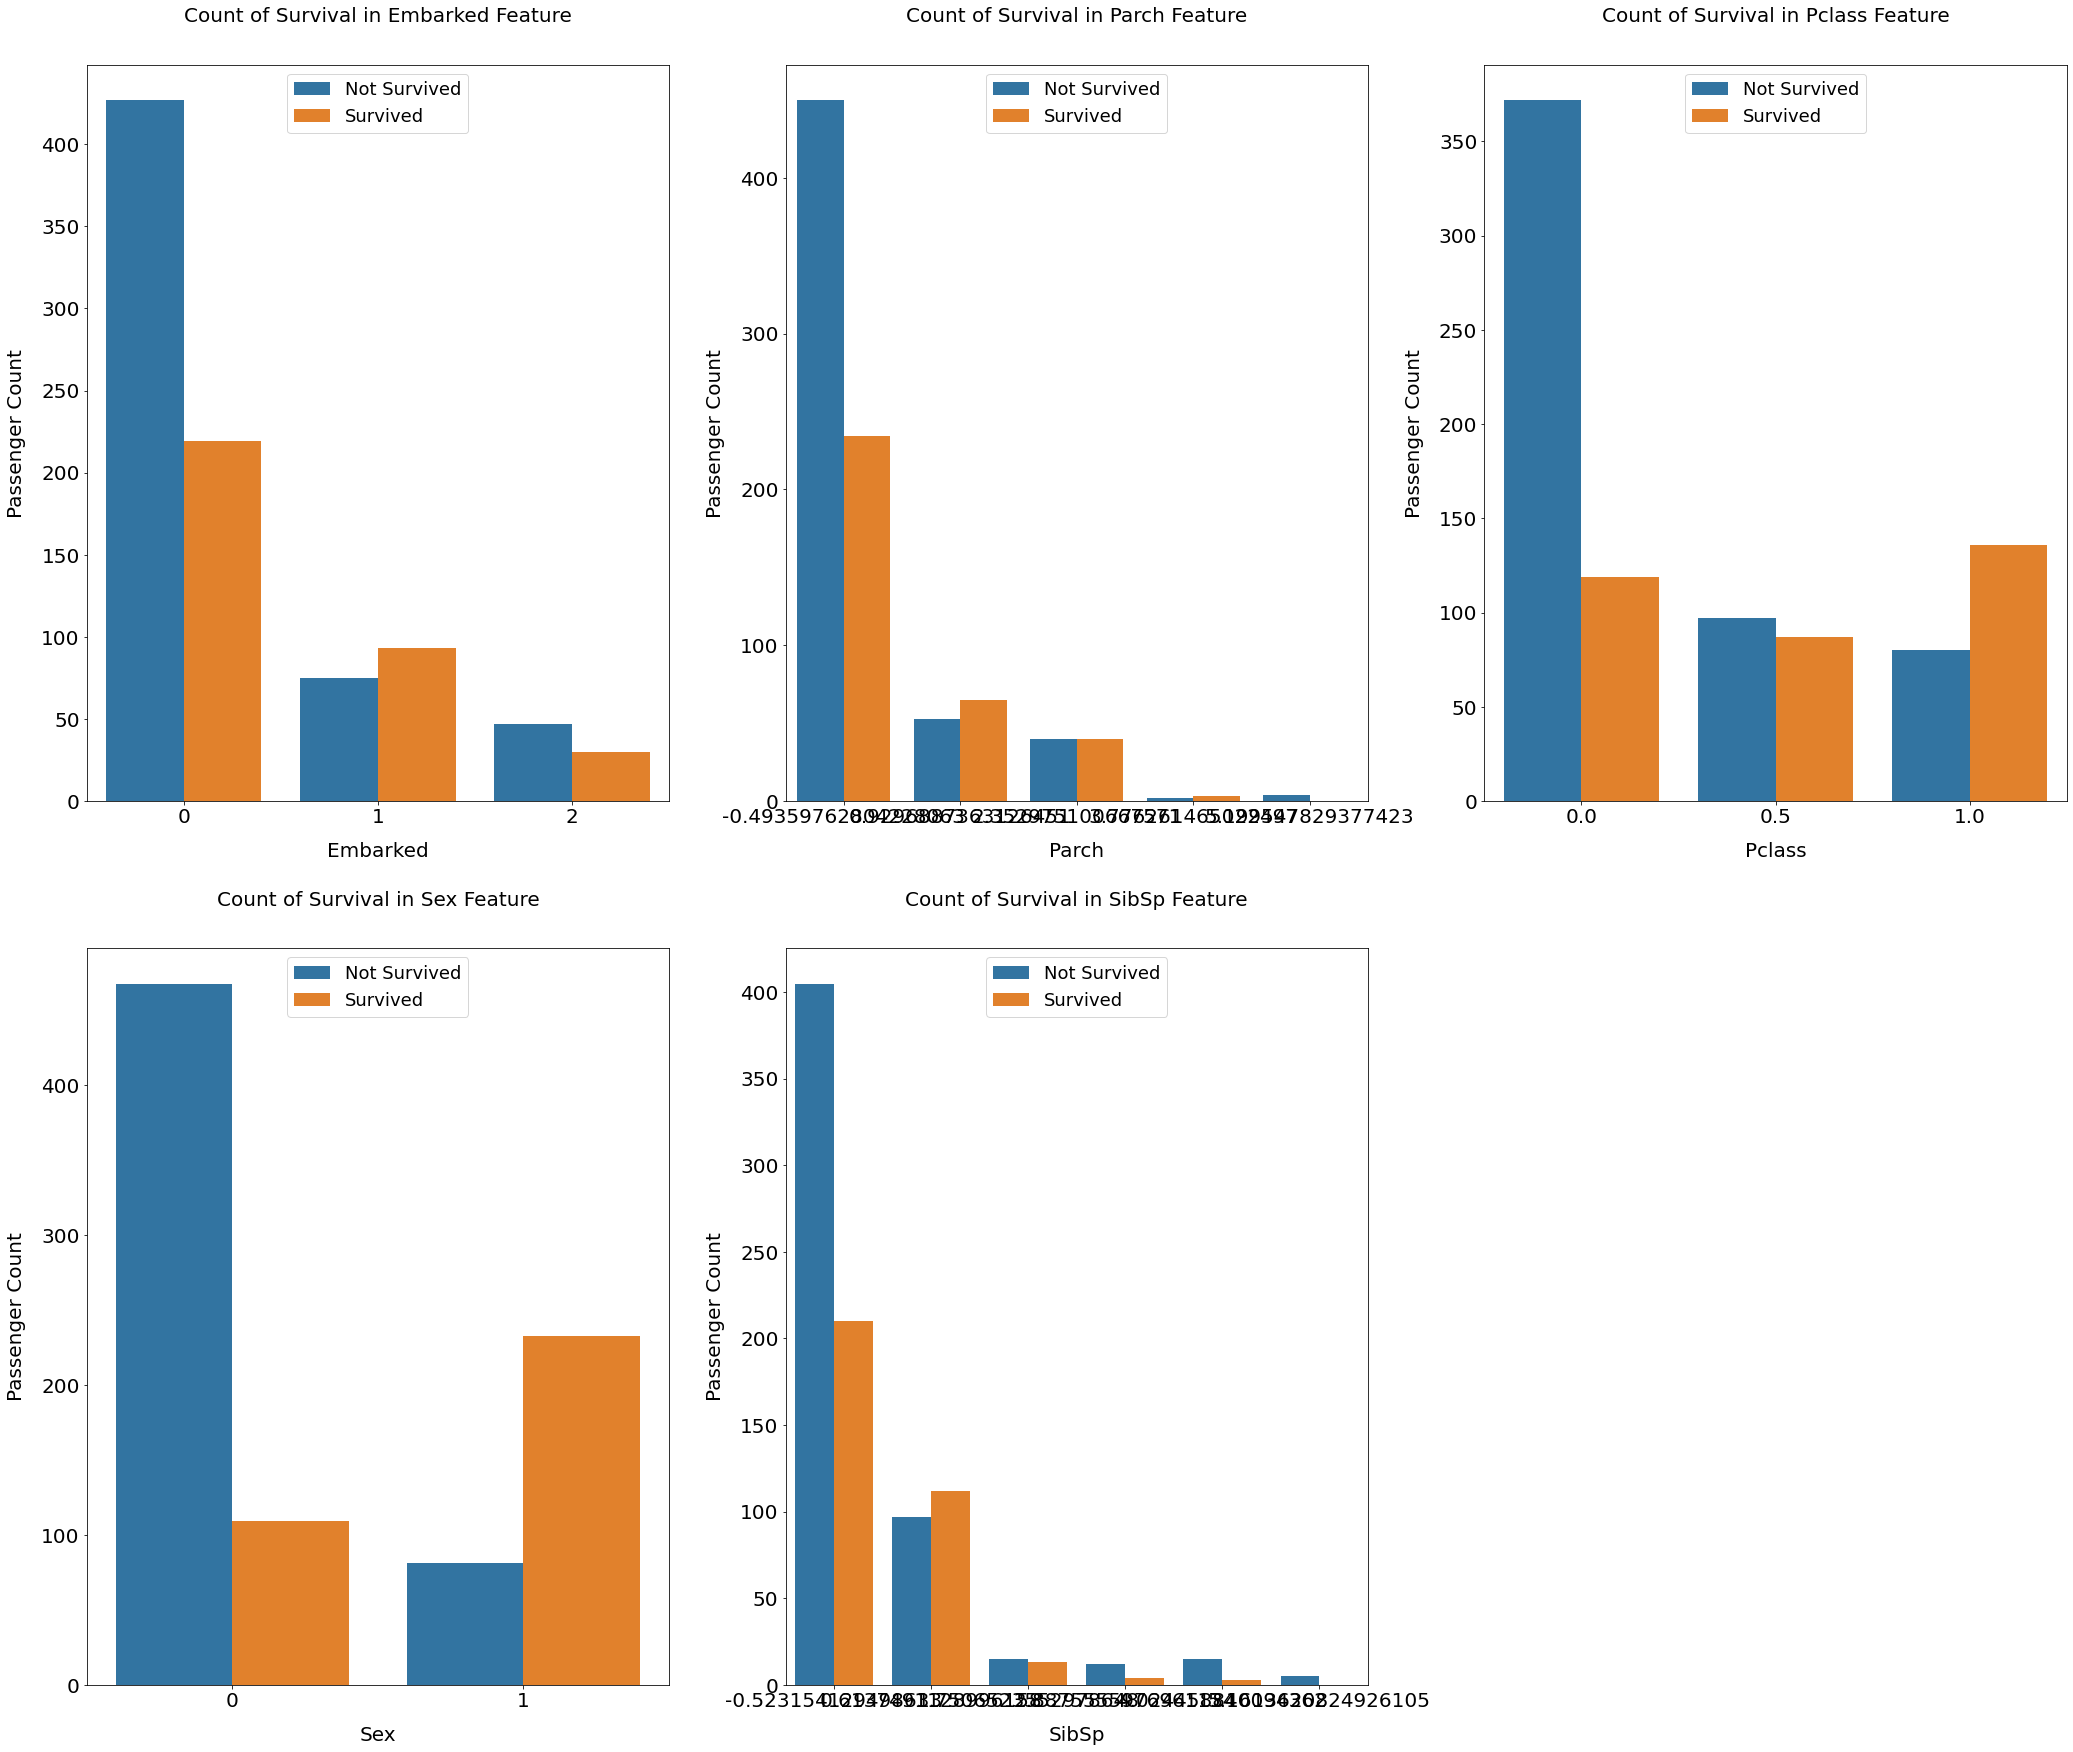

In [43]:
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp',]

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=df)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

In [44]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,0.338481,-0.070582,0.012138,0.116258,0.190926
Pclass,0.338481,1.000000,0.331880,-0.044981,0.019825,0.433904
Age,-0.070582,0.331880,1.000000,-0.292568,-0.245313,0.060689
SibSp,0.012138,-0.044981,-0.292568,1.000000,0.419175,0.345796
Parch,0.116258,0.019825,-0.245313,0.419175,1.000000,0.266408
Fare,0.190926,0.433904,0.060689,0.345796,0.266408,1.000000


<AxesSubplot:>

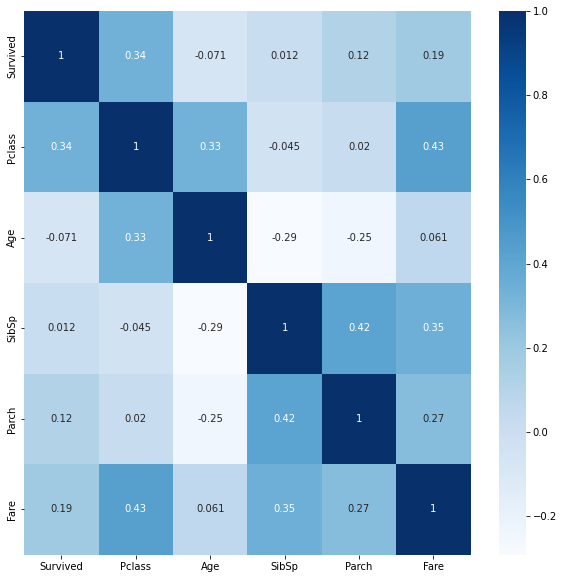

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

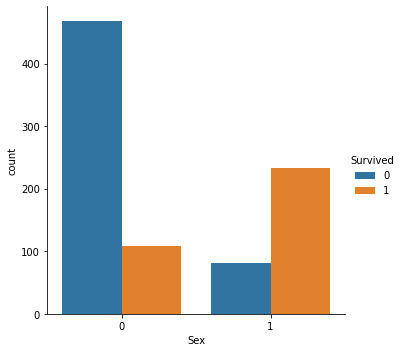

In [46]:
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = df)

In [47]:
df.groupby(['Sex','Survived']) ['Survived'].count()

Sex  Survived
0    0           468
     1           109
1    0            81
     1           233
Name: Survived, dtype: int64

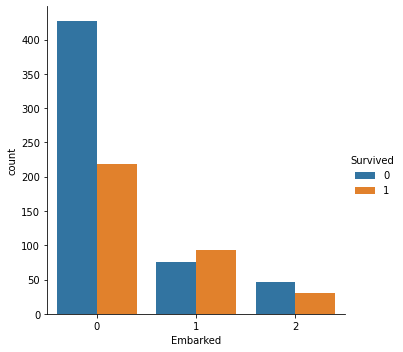

In [48]:
sns.catplot(x ="Embarked", hue ="Survived",
kind ="count", data = df)

In [49]:
df.groupby(['Embarked','Survived']) ['Survived'].count()

Embarked  Survived
0         0           427
          1           219
1         0            75
          1            93
2         0            47
          1            30
Name: Survived, dtype: int64

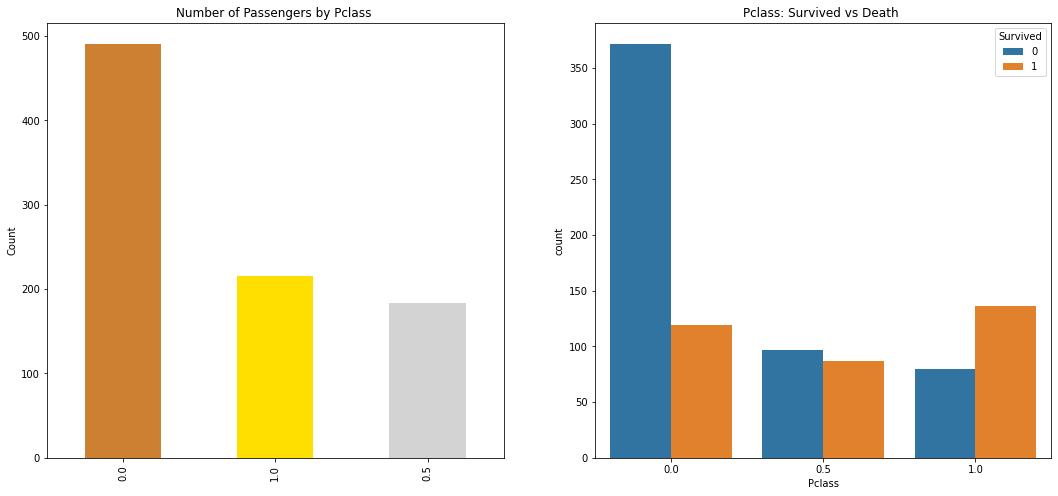

In [50]:
f,ax = plt.subplots(1,2 , figsize = (18,8))
df['Pclass'].value_counts().plot.bar( color = ['#cd7f32' , '#ffdf00' , '#d3d3d3'] , ax = ax[0])
ax[0].set_title('Number of Passengers by Pclass ')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data = df , ax= ax[1])
ax[1].set_title('Pclass: Survived vs Death ')
plt.show()

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [90]:
X = df.drop(['Survived'],axis=1).values
y = df['Survived'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [91]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))
confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        99
           1       0.84      0.76      0.80        80

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



array([[87, 12],
       [19, 61]], dtype=int64)